In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import LinearRegression
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

In [21]:
def runplt():
    plt.figure()
    plt.title(u'匹萨价格与直径数据',fontproperties=font)
    plt.xlabel(u'直径（英寸）',fontproperties=font)
    plt.ylabel(u'价格（美元）',fontproperties=font)
    plt.axis([0, 25, -5, 25])
    plt.grid(True)
    return plt

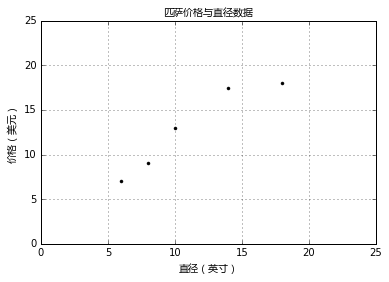

In [6]:
plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)
print('预测一张12英寸匹萨价格：$%.2f' % model.predict([[12]])[0])

预测一张12英寸匹萨价格：$13.68


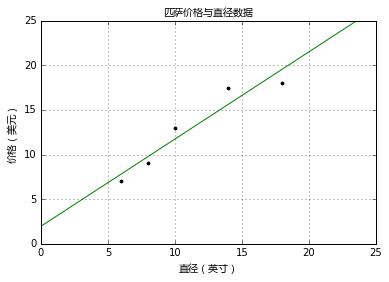

In [9]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()

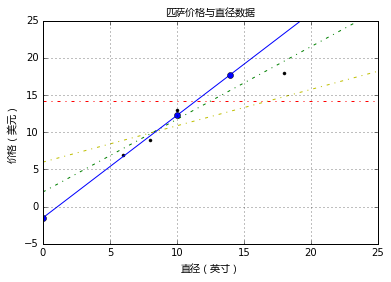

In [24]:
plt = runplt()
# plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])# [1:-1] 第一个到倒数第二个
y5 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')
plt.show()

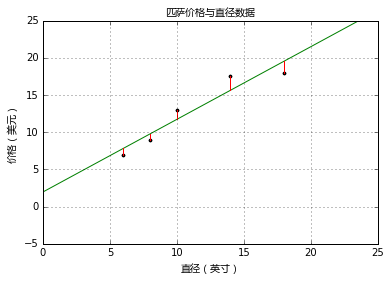

In [26]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')
plt.show()

In [30]:
(model.predict(X) - y) ** 2

array([[ 0.67778345],
       [ 0.60196224],
       [ 1.61684331],
       [ 3.48337103],
       [ 2.36788479]])

In [33]:
import numpy as np
print('残差平方和: %.2f' % np.mean((model.predict(X) - y) ** 2))
print(np.var(model.predict(X) - y, ddof=1))

残差平方和: 1.75
2.1869612069


In [32]:
from __future__ import division
xbar = (6 + 8 + 10 + 14 + 18) / 5
print xbar
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print(variance)
print(np.var([6, 8, 10, 14, 18], ddof=1))# var方法可以直接计算方差，ddof参数是贝塞尔(无偏估计)校正系数（Bessel's
#  correction），设置为1，可得样本方差无偏估计量。

11.2
23.2
23.2


In [36]:
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
print ybar
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 - xbar) *(13 - ybar) +
       (14 - xbar) * (17.5 - ybar) + (18 - xbar) * (18 - ybar)) / 4
print(cov) #协方差

12.9
22.65


In [37]:
import numpy as np
print(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

22.65


In [38]:
# 测试集
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
model.score(X_test, y_test)

0.66200528638545164